In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mtick

sns.set_theme(style="whitegrid")

output_dir = 'outputs'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [45]:
# Load datasets
try:
    trader_df = pd.read_csv('historical_data.csv')
    sentiment_df = pd.read_csv('fear_greed_index.csv')

    print("Files loaded successfully!")
    print("\nTrader Data Columns:")
    print(trader_df.columns)

    print("\nSentiment Data Columns:")
    print(sentiment_df.columns)

except FileNotFoundError:
    print("ERROR: CSV file not found")

Files loaded successfully!

Trader Data Columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Sentiment Data Columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [46]:
# Data Cleaning and Preparation

trader_df['date_key'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M").dt.date

sentiment_df['date_key'] = pd.to_datetime(sentiment_df['date']).dt.date

# Merging
merged_df = pd.merge(trader_df, sentiment_df, on='date_key')

print("\n ---ALL COLUMNS IN merged_df---")
print(merged_df.columns)
print("---------------------------------")


print("\n---Data merged successfully. Here's a sample:---")
print(merged_df[['date_key', 'classification', 'Closed PnL', 'Size USD']].head())


 ---ALL COLUMNS IN merged_df---
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date_key', 'timestamp', 'value', 'classification',
       'date'],
      dtype='object')
---------------------------------

---Data merged successfully. Here's a sample:---
     date_key classification  Closed PnL  Size USD
0  2024-12-02  Extreme Greed         0.0   7872.16
1  2024-12-02  Extreme Greed         0.0    127.68
2  2024-12-02  Extreme Greed         0.0   1150.63
3  2024-12-02  Extreme Greed         0.0   1142.04
4  2024-12-02  Extreme Greed         0.0     69.75


--- Analysis 1: Average Profit & Loss vs. Sentiment ---
classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64
Plot saved to outputs/pnl_vs_sentiment.png


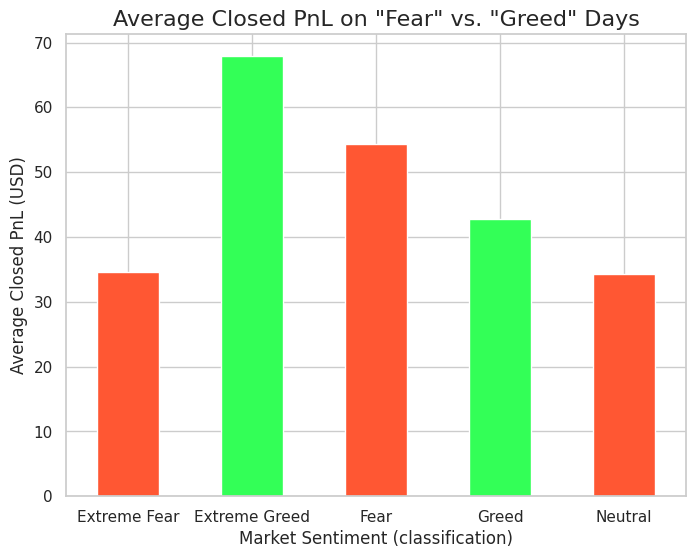

In [47]:
print("--- Analysis 1: Average Profit & Loss vs. Sentiment ---")

# Group by the correct column 'classification' and calculate the mean of 'Closed PnL'
pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean()

print(pnl_by_sentiment)

# --- Visualization ---
plt.figure(figsize=(8, 6))
pnl_by_sentiment.plot(kind='bar', color=['#FF5733', '#33FF57'])
plt.title('Average Closed PnL on "Fear" vs. "Greed" Days', fontsize=16)
plt.ylabel('Average Closed PnL (USD)', fontsize=12)
plt.xlabel('Market Sentiment (classification)', fontsize=12)
plt.xticks(rotation=0)

plot_path = os.path.join(output_dir, 'pnl_vs_sentiment.png')
plt.savefig(plot_path)

print(f"Plot saved to {plot_path}")
plt.show()

--- Analysis 2 Side(Buy/Sell) vs. Sentiment ---
Side                 BUY      SELL
classification                    
Extreme Fear    0.510981  0.489019
Extreme Greed   0.448590  0.551410
Fear            0.489513  0.510487
Greed           0.488559  0.511441
Neutral         0.503343  0.496657
Plot saved to outputs/side_vs_sentiment.png


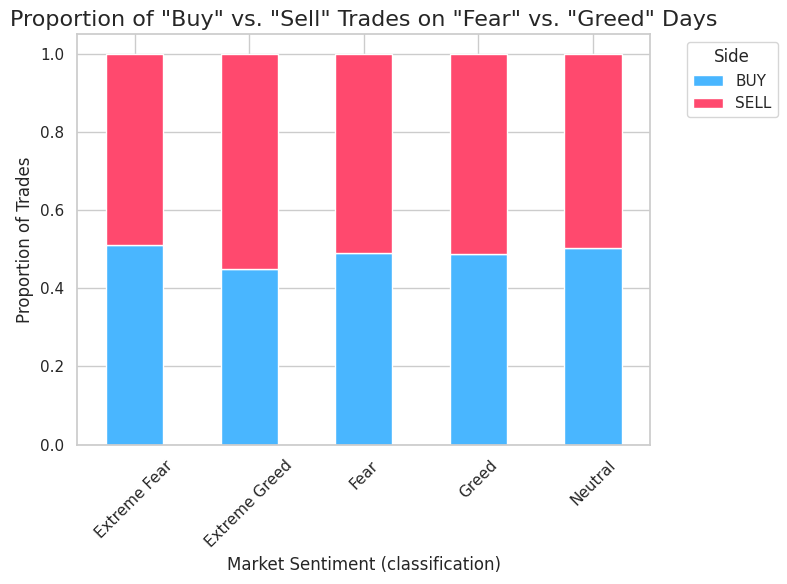

In [48]:
print("--- Analysis 2 Side(Buy/Sell) vs. Sentiment ---")

# Group by sentiment and then by 'Side', and count the occurrences
side_by_sentiment = merged_df.groupby('classification')['Side'].value_counts(normalize=True).unstack()

print(side_by_sentiment)

# --- Visualization ---
side_by_sentiment.plot(kind='bar', stacked=True, color=['#49B6FF', '#FF496E'], figsize=(8, 6))
plt.title('Proportion of "Buy" vs. "Sell" Trades on "Fear" vs. "Greed" Days', fontsize=16)
plt.ylabel('Proportion of Trades', fontsize=12)
plt.xlabel('Market Sentiment (classification)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Side', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plot_path = os.path.join(output_dir, 'side_vs_sentiment.png')
plt.savefig(plot_path)

print(f"Plot saved to {plot_path}")
plt.show()

--- Analysis 3: Average Trade Volume (Size USD) vs. Sentiment ---
classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64
Plot saved to outputs/volume_vs_sentiment.png


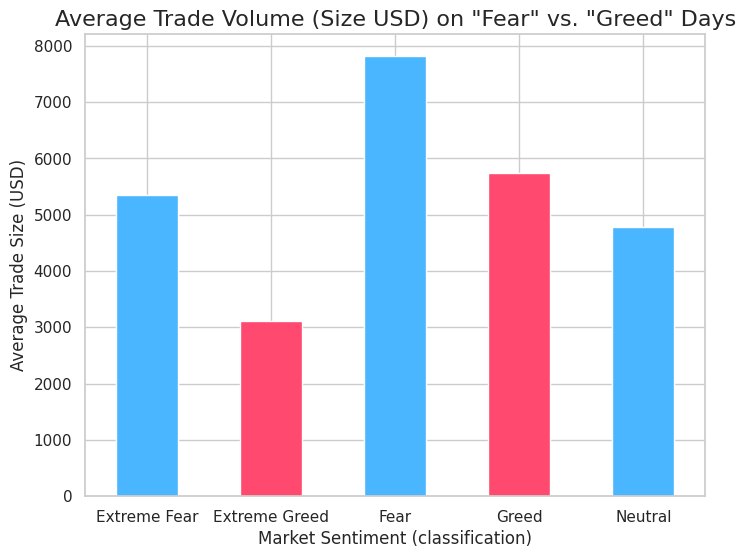

In [49]:
print("--- Analysis 3: Average Trade Volume (Size USD) vs. Sentiment ---")

# Group by 'classification' and calculate the average trade 'Size USD'
merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce')
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].mean()

print(volume_by_sentiment)

# --- Visualization ---
plt.figure(figsize=(8, 6))
volume_by_sentiment.plot(kind='bar', color=['#49B6FF', '#FF496E'])
plt.title('Average Trade Volume (Size USD) on "Fear" vs. "Greed" Days', fontsize=16)
plt.ylabel('Average Trade Size (USD)', fontsize=12)
plt.xlabel('Market Sentiment (classification)', fontsize=12)
plt.xticks(rotation=0)

plot_path = os.path.join(output_dir, 'volume_vs_sentiment.png')
plt.savefig(plot_path)

print(f"Plot saved to {plot_path}")
plt.show()